In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
sns.set()

In [2]:
data = pd.read_csv('Data_Train.csv')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
data.isnull().sum().sum()

2

In [5]:
data.shape

(10683, 11)

In [6]:
data.dropna(axis=0, inplace=True)

In [7]:
data.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


##  EDA 

In [8]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
data['Journey_Day']=pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.day
data['Journey_month']=pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.month
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [10]:
# we can seperate year as well but here number of year is only one 2019. So no need to seperate
data.drop("Date_of_Journey", axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [11]:
# Dep_Time we have to seperate hour time and minute time by the help of to_datetime.
data['Dep_hour']=pd.to_datetime(data["Dep_Time"]).dt.hour
data['Dep_min']=pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop("Dep_Time", axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [12]:
#Simmilary seperate hour and minute from the Arrival_Time feature.
data["Arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_min"]=pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop("Arrival_Time", axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [13]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]      

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [14]:
data["Duration_hour"]=duration_hours
data["Duration_mins"]=duration_mins
data.drop("Duration", axis=1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handling Categorial Data

In [15]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

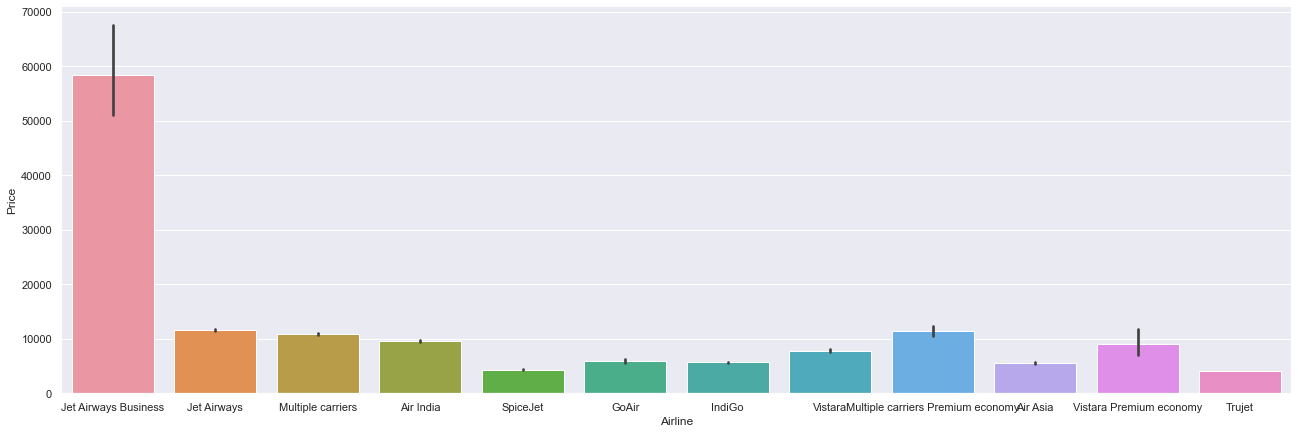

In [16]:
sns.catplot("Airline", "Price", data=data.sort_values("Price", ascending=False), kind="bar",height=6, aspect=3)
plt.show()

In [17]:
#Airline feature have Nominal categorical data, So here i will use OneHotEncoding

airline = data[["Airline"]]
airline = pd.get_dummies(airline, drop_first=True)

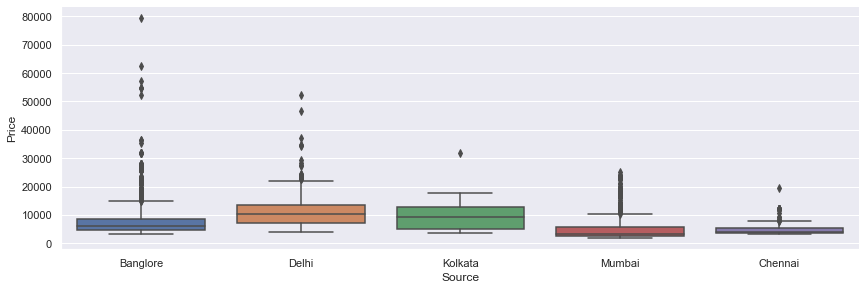

In [18]:
sns.catplot("Source","Price", data=data.sort_values("Price", ascending=False), kind="box", height=4, aspect=3)
plt.show()

In [19]:
source = data[["Source"]]
source = pd.get_dummies(source, drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [20]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

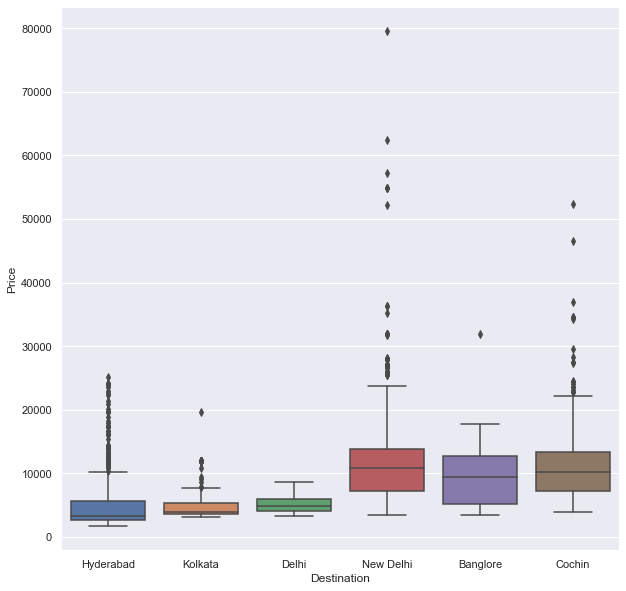

In [21]:
plt.figure(figsize=(10,10))
sns.boxplot("Destination","Price", data=data.sort_values("Price", ascending=True))
plt.show()

In [22]:
destination = data[["Destination"]]
destination = pd.get_dummies(destination, drop_first=True)

In [23]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [24]:
# Route and Total_Stops are related to each other
# More than 80% of data has no information in Additional_info feature, so better to drop this feature

data.drop(["Route", "Additional_Info"], axis=1, inplace=True)

In [25]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [26]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [27]:
# Total_Stops feature have ordinal data so we perform LabelEncoder
# Here i am going to user replace method

data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace=True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [28]:
# Now concatenate dataframe ------  data+airline+source+destination
train_data = pd.concat([data, airline, source, destination], axis=1)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [29]:
train_data.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)
train_data.head()

,Total_Stops,Price,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
train_data.shape

(10682, 30)

## Feature Selection

In [31]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [32]:
X = train_data.loc[:,['Total_Stops', 'Journey_Day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'] ]
X.head()

,Total_Stops,Journey_Day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
y = train_data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

(10.5, -0.5)

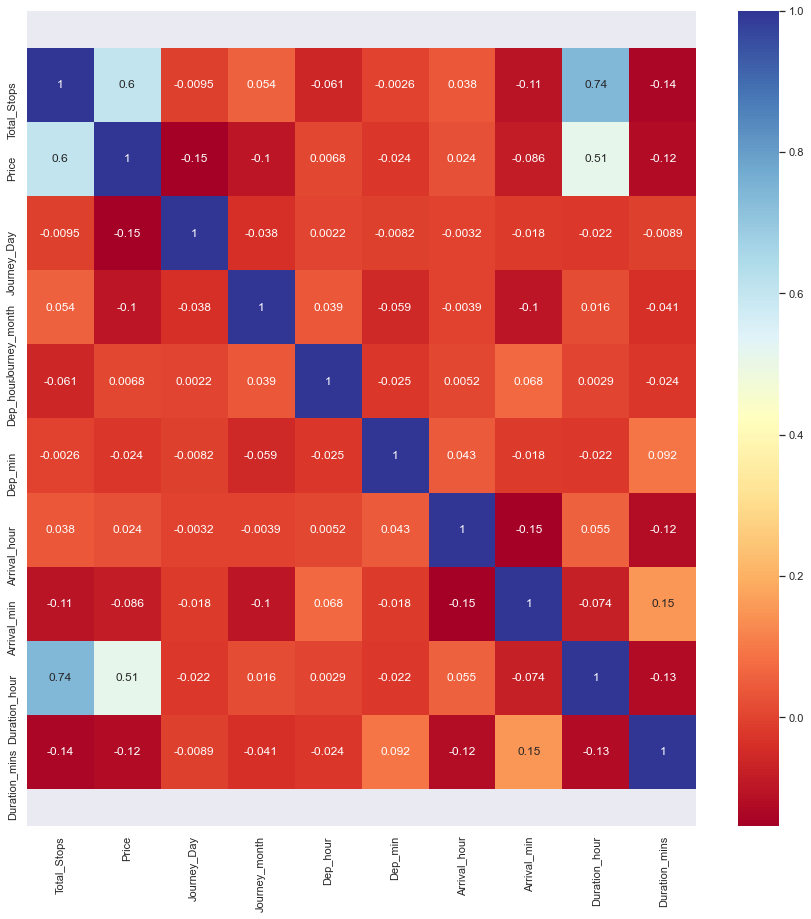

In [34]:
# Find the correlation between independent and dependent feature
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="RdYlBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
select = ExtraTreesRegressor()
select.fit(X, y)

ExtraTreesRegressor()

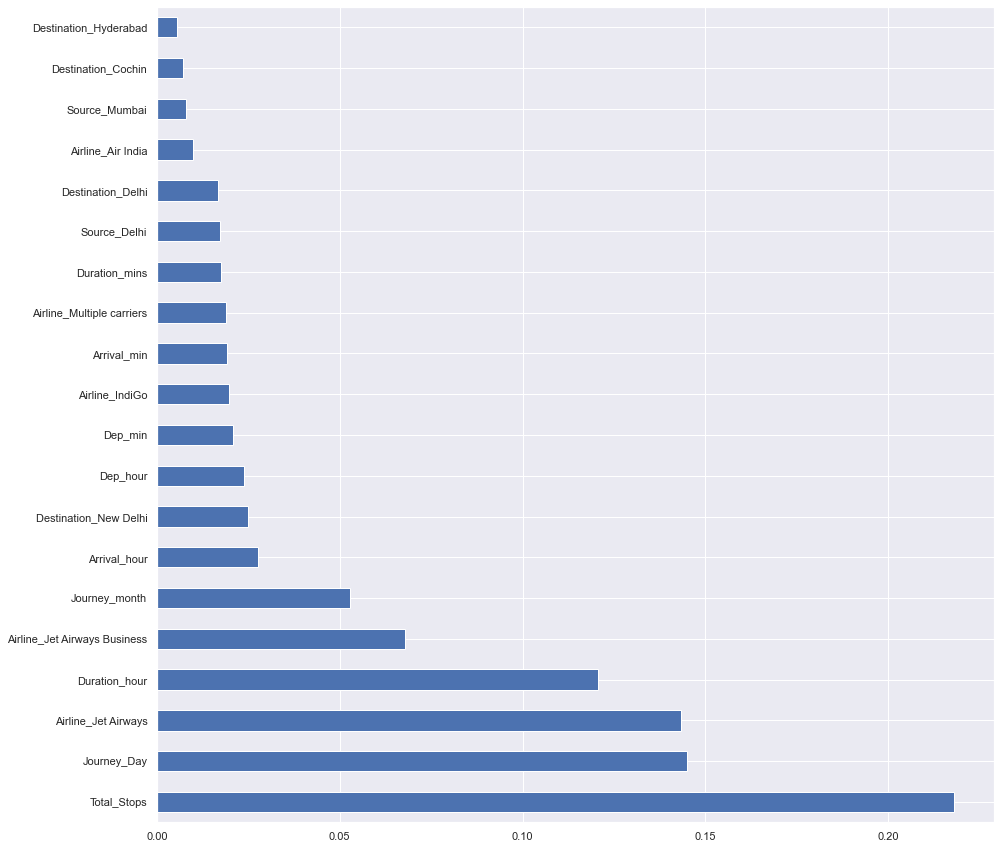

In [36]:
plt.figure(figsize=(15,15))
Imp_feature=pd.Series(select.feature_importances_, index=X.columns)
Imp_feature.nlargest(20).plot(kind="barh")
plt.show()

## Fitting Model

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr.score(X_train, y_train)

0.625577518543998

In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_predict = dtr.predict(X_test)
dtr.score(X_train, y_train)

0.9697553091502402

In [40]:
dtr.score(X_test, y_test)

0.6500054741191841

In [41]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_predict = rfr.predict(X_test)
rfr.score(X_train, y_train)

0.9525550874639239

In [42]:
rfr.score(X_test, y_test)

0.8095955885858437

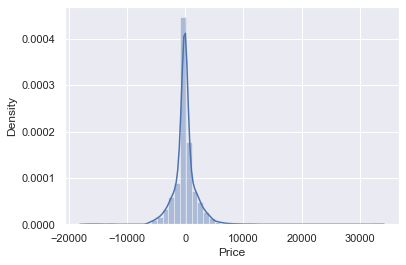

In [43]:
sns.distplot(y_test - rfr_predict)
plt.show()

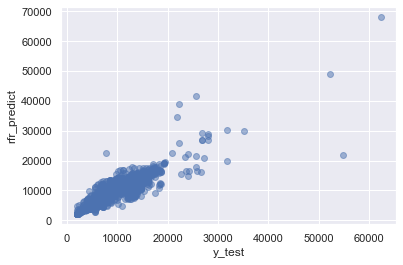

In [44]:
plt.scatter(y_test, rfr_predict, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("rfr_predict")
plt.show()

In [45]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y_test, rfr_predict))
print("MSE:", mean_squared_error(y_test, rfr_predict))
print("RMSE:",np.sqrt(mean_squared_error(y_test, rfr_predict)))

MAE: 1199.643892887659
MSE: 4251801.526208636
RMSE: 2061.9897008008156


## Hyperparmeter Tuning

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [48]:
#Create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [49]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=40, n_jobs = 1)

In [50]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  21.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  20.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  22.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  25.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  26.8s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  23.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  28.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=40, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 25}

In [52]:
rf_prediction = rf_random.predict(X_test)

In [53]:
r2_score(y_test, rfr_predict)

0.8095955885858437

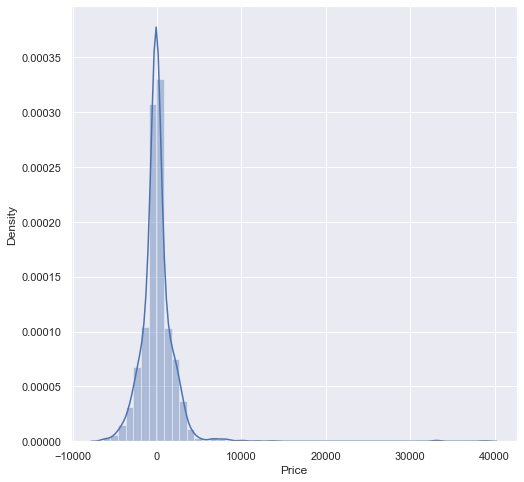

In [54]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-rf_prediction)
plt.show()

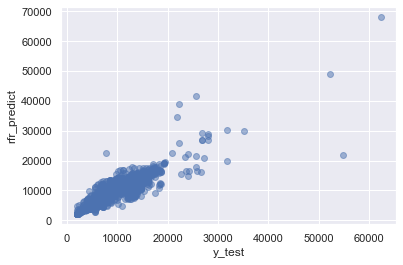

In [55]:
plt.scatter(y_test, rfr_predict, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("rfr_predict")
plt.show()

In [56]:
print("MAE:", mean_absolute_error(y_test, rf_prediction))
print("MSE:", mean_squared_error(y_test, rf_prediction))
print("RMSE:",np.sqrt(mean_squared_error(y_test, rf_prediction)))

MAE: 1182.4943990369645
MSE: 4696401.286423162
RMSE: 2167.118198535364


## Save the model

In [57]:
import pickle
file = open("rfr_flight_price.pkl", 'wb')
pickle.dump(rfr, file)